In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import scipy.stats as st

In [4]:
# a helper to calcualte confidence intervals
def get_conf_interval(arr, percentage=.9):
    return st.t.interval(percentage, len(arr)-1, loc=np.mean(arr), scale=st.sem(arr))


def get_mean_with_intervals(df, var, intervals):
    return (
        np.mean(df[var]),
        *[ get_conf_interval(df[var], i) for i in intervals ]
    )

In [5]:
LINE_STYLES =['-',  ':', '-.', (0, (3, 1, 1, 1, 1, 1)), '--']

# Load data

In [6]:
data_directory = "/bigdata/web_tracking/data/"

In [7]:
SELECTED_USER_IDS = pd.read_csv(data_directory + '/traj-non-stationary/selected_users.csv')

In [8]:
BIN_NON_STAT_RES = SELECTED_USER_IDS.merge(pd.read_csv(data_directory + '/traj-non-stationary/trajectory-non-stationery-predicatability.csv'), on='user')
SEQ_NON_STAT_RES = SELECTED_USER_IDS.merge(pd.read_csv(data_directory + '/traj-domain-aggregated/trajectory-domain-aggregated-predicatability.csv'), on='user')
STAT_RES         = SELECTED_USER_IDS.merge(pd.read_csv(data_directory + '/traj-binned/trajectory-binned-1-predictability.csv'), on='user')

# Stationarity trajectory $T^\text{stat}$

#### Entropy distributions

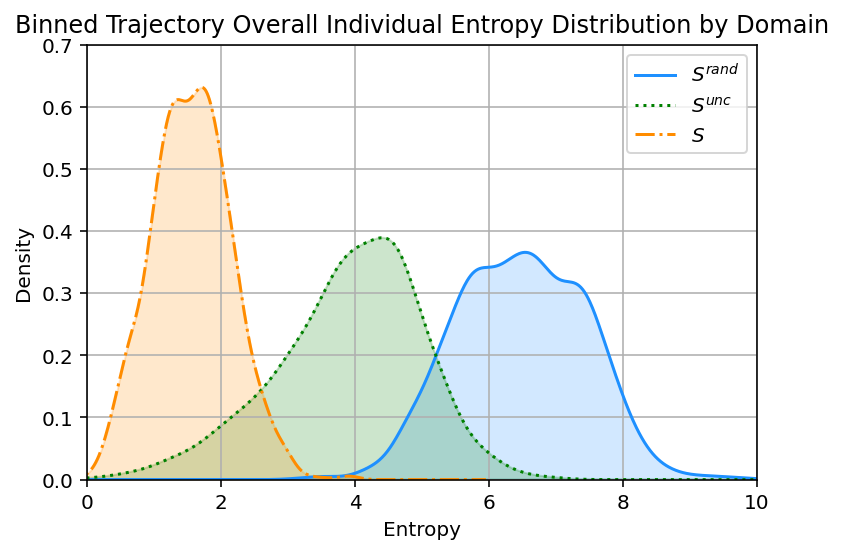

In [9]:
TITLE = 'Binned Trajectory Overall Individual Entropy Distribution by Domain'
AX_COLORS = ['dodgerblue', 'green', 'darkorange', ]
ARGS = dict(grid=True, xlim=(0, 10), ylim=(0, 0.7), color=AX_COLORS)

ax = STAT_RES[['domain_entropy_random', 'domain_entropy_shannon', 'domain_entropy_lz', ]].plot.kde(**ARGS)

maxes = []
styles = LINE_STYLES[:len(ax.get_lines())]
for line, style, color in zip(ax.get_lines(), styles, AX_COLORS):
    line.set_linestyle(style)
    x = line.get_xydata()[:,0]
    y = line.get_xydata()[:,1]
    ax.fill_between(x, y, color=color, alpha=0.2)
    maxes.append(x[np.where(y == max(y))][0])
ax.legend(['$S^{rand}$', '$S^{unc}$',  '$S$'])
ax.set_xlabel('Entropy')
plt.title(TITLE);

#### Predictability distributions

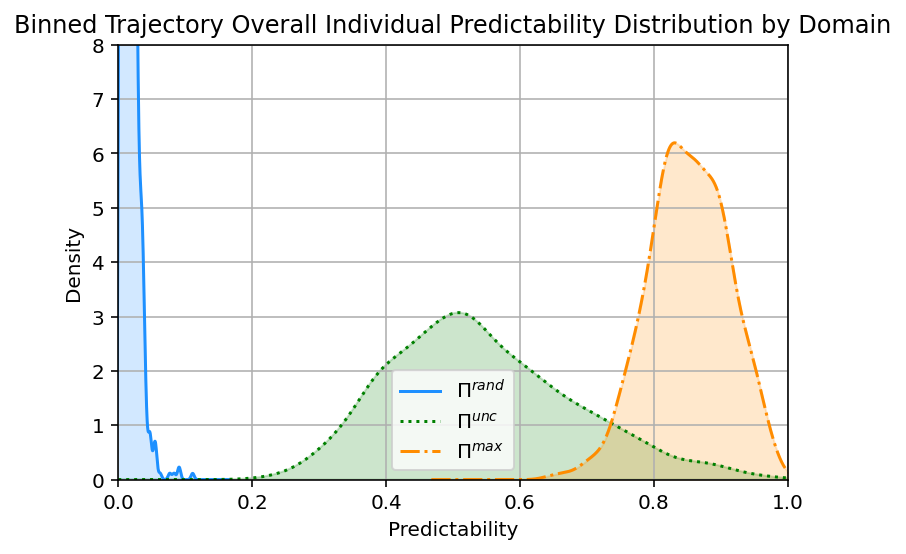

In [10]:
TITLE = 'Binned Trajectory Overall Individual Predictability Distribution by Domain'
AX_COLORS = ['dodgerblue', 'green', 'darkorange']
ARGS = dict(grid=True, xlim=(0, 1), ylim=(0, 8), color=AX_COLORS)

ax = STAT_RES[['domain_pi_rand', 'domain_pi_unc', 'domain_pi_max']].plot.kde(**ARGS)

maxes = []
styles = LINE_STYLES[:len(ax.get_lines())]

for line, style, color in zip(ax.get_lines(), styles, AX_COLORS):
    line.set_linestyle(style)
    x = line.get_xydata()[:,0]
    y = line.get_xydata()[:,1]
    ax.fill_between(x, y, color=color, alpha=0.2)
    maxes.append(x[np.where(y == max(y))][0])
    
ax.legend(['$\Pi^{rand}$', '$\Pi^{unc}$', '$\Pi^{max}$'])
ax.set_xlabel('Predictability')
plt.title(TITLE);

#### Confidence intervals

In [11]:
display(
pd.DataFrame(
    data = [
        get_mean_with_intervals(STAT_RES, 'domain_pi_rand', [.90, .95]),
        get_mean_with_intervals(STAT_RES, 'domain_pi_unc', [.90, .95]),
        get_mean_with_intervals(STAT_RES, 'domain_pi_max', [.90, .95]),
    ],
    columns=['Mean', '.90 CI', '.95 CI'],
    index = ["$\Pi^{rand}$", "$\Pi^{unc}$", "$\Pi^{max}$", ]
    
) \
.style \
    .background_gradient('Oranges', subset=['Mean']) \
    .format({
        'Mean': '{0:.4f}',
        '.90 CI': lambda t: f'[{t[0]:.4f}, {t[1]:.4f}]',
        '.95 CI': lambda t: f'[{t[0]:.4f}, {t[1]:.4f}]',
    })
)

,Mean,.90 CI,.95 CI
$\Pi^{rand}$,0.0140,"[0.0135, 0.0144]","[0.0135, 0.0145]"
$\Pi^{unc}$,0.5432,"[0.5373, 0.5491]","[0.5361, 0.5503]"
$\Pi^{max}$,0.8511,"[0.8485, 0.8536]","[0.8480, 0.8541]"


# Non-stationarity binned trajectory $T^\text{binNonStat}$

#### Entropy distributions 

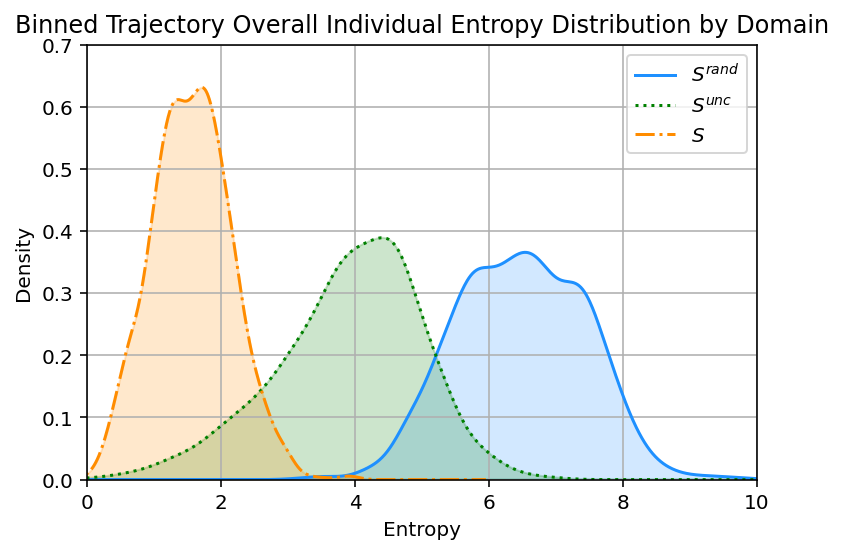

In [12]:
TITLE = 'Binned Trajectory Overall Individual Entropy Distribution by Domain'
AX_COLORS = ['dodgerblue', 'green', 'darkorange', ]
ARGS = dict(grid=True, xlim=(0, 10), ylim=(0, 0.7), color=AX_COLORS)

ax = STAT_RES[['domain_entropy_random', 'domain_entropy_shannon', 'domain_entropy_lz', ]].plot.kde(**ARGS)

maxes = []
styles = LINE_STYLES[:len(ax.get_lines())]

for line, style, color in zip(ax.get_lines(), styles, AX_COLORS):
    line.set_linestyle(style)
    x = line.get_xydata()[:,0]
    y = line.get_xydata()[:,1]
    ax.fill_between(x, y, color=color, alpha=0.2)
    maxes.append(x[np.where(y == max(y))][0])
    
ax.legend(['$S^{rand}$', '$S^{unc}$',  '$S$'])
ax.set_xlabel('Entropy')
plt.title(TITLE);

#### Predictability distributions

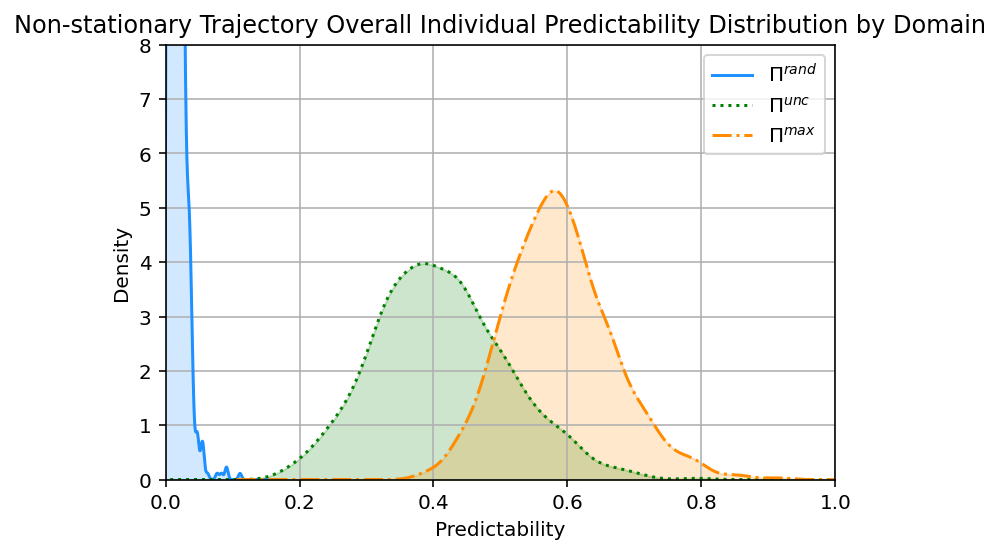

In [13]:
TITLE = 'Non-stationary Trajectory Overall Individual Predictability Distribution by Domain'
AX_COLORS = ['dodgerblue', 'green', 'darkorange']
ARGS = dict(grid=True, xlim=(0, 1), ylim=(0, 8), color=AX_COLORS)

ax = BIN_NON_STAT_RES[['domain_pi_rand', 'domain_pi_unc', 'domain_pi_max']].plot.kde(**ARGS)

maxes = []
styles = LINE_STYLES[:len(ax.get_lines())]

for line, style, color in zip(ax.get_lines(), styles, AX_COLORS):
    line.set_linestyle(style)
    x = line.get_xydata()[:,0]
    y = line.get_xydata()[:,1]
    ax.fill_between(x, y, color=color, alpha=0.2)
    maxes.append(x[np.where(y == max(y))][0])
    
ax.legend(['$\Pi^{rand}$', '$\Pi^{unc}$', '$\Pi^{max}$'])
ax.set_xlabel('Predictability')
plt.title(TITLE);

#### Confidence intervals

In [14]:
display(
pd.DataFrame(
    data = [
        get_mean_with_intervals(BIN_NON_STAT_RES, 'domain_pi_rand', [.90, .95]),
        get_mean_with_intervals(BIN_NON_STAT_RES, 'domain_pi_unc', [.90, .95]),
        get_mean_with_intervals(BIN_NON_STAT_RES, 'domain_pi_max', [.90, .95]),
    ],
    columns=['Mean', '.90 CI', '.95 CI'],
    index = ["$\Pi^{rand}$", "$\Pi^{unc}$", "$\Pi^{max}$", ]
    
) \
.style \
    .background_gradient('Blues', subset=['Mean']) \
    .format({
        'Mean': '{0:.4f}',
        '.90 CI': lambda t: f'[{t[0]:.4f}, {t[1]:.4f}]',
        '.95 CI': lambda t: f'[{t[0]:.4f}, {t[1]:.4f}]',
    })
)

,Mean,.90 CI,.95 CI
$\Pi^{rand}$,0.0140,"[0.0135, 0.0144]","[0.0135, 0.0145]"
$\Pi^{unc}$,0.4123,"[0.4080, 0.4166]","[0.4072, 0.4174]"
$\Pi^{max}$,0.5880,"[0.5845, 0.5914]","[0.5839, 0.5921]"


# Non-stationarity sequential trajectory $T^\text{seqNonStat}$

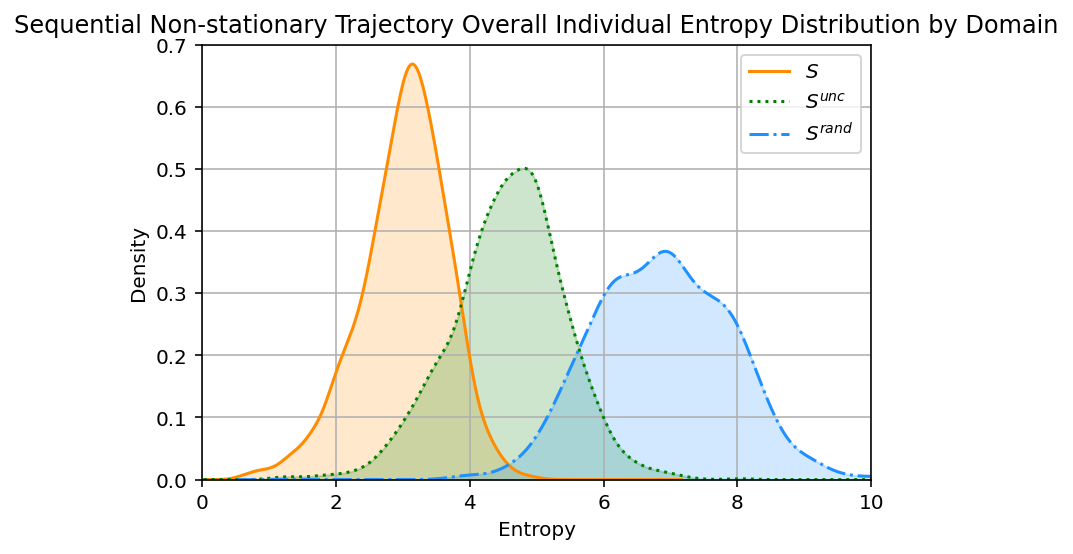

In [15]:
TITLE = 'Sequential Non-stationary Trajectory Overall Individual Entropy Distribution by Domain'
AX_COLORS = ['darkorange', 'green', 'dodgerblue', ]
ARGS = dict(grid=True, xlim=(0, 10), ylim=(0, 0.7), color=AX_COLORS)

ax = SEQ_NON_STAT_RES[['domain_entropy_lz', 'domain_entropy_shannon', 'domain_entropy_random', ]].plot.kde(**ARGS)

maxes = []
styles = LINE_STYLES[:len(ax.get_lines())]

for line, style, color in zip(ax.get_lines(), styles, AX_COLORS):
    line.set_linestyle(style)
    x = line.get_xydata()[:,0]
    y = line.get_xydata()[:,1]
    ax.fill_between(x, y, color=color, alpha=0.2)
    maxes.append(x[np.where(y == max(y))][0])
    
ax.legend(['$S$', '$S^{unc}$', '$S^{rand}$'])
ax.set_xlabel('Entropy')
plt.title(TITLE);

#### Predictability distributions

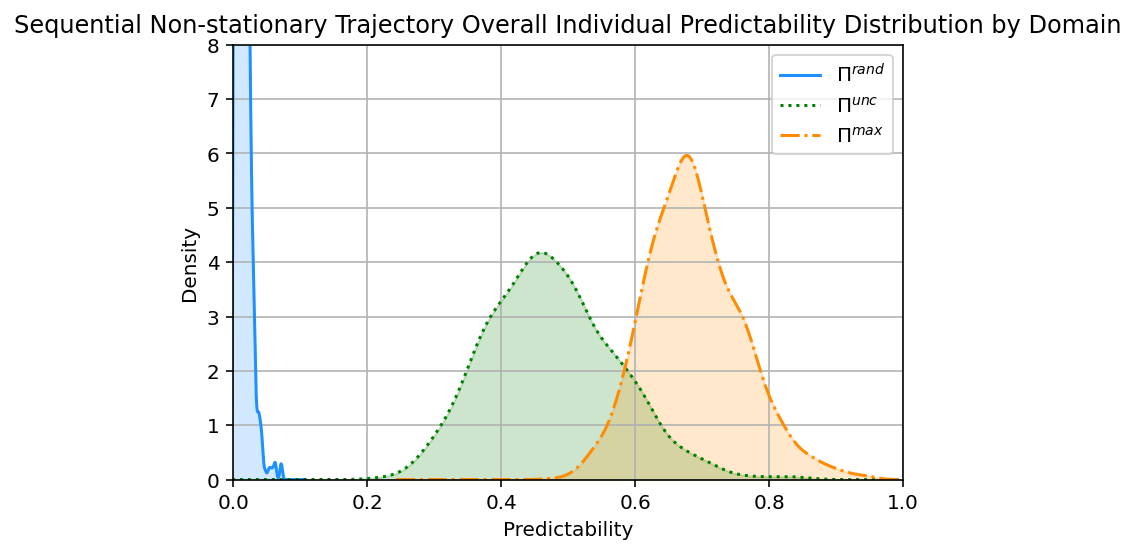

In [16]:
TITLE = 'Sequential Non-stationary Trajectory Overall Individual Predictability Distribution by Domain'
AX_COLORS = ['dodgerblue', 'green', 'darkorange']
ARGS = dict(grid=True, xlim=(0, 1), ylim=(0, 8), color=AX_COLORS)

ax = SEQ_NON_STAT_RES[['domain_pi_rand', 'domain_pi_unc', 'domain_pi_max']].plot.kde(**ARGS)

maxes = []
styles = LINE_STYLES[:len(ax.get_lines())]

for line, style, color in zip(ax.get_lines(), styles, AX_COLORS):
    line.set_linestyle(style)
    x = line.get_xydata()[:,0]
    y = line.get_xydata()[:,1]
    ax.fill_between(x, y, color=color, alpha=0.2)
    maxes.append(x[np.where(y == max(y))][0])
    
ax.legend(['$\Pi^{rand}$', '$\Pi^{unc}$', '$\Pi^{max}$'])
ax.set_xlabel('Predictability')
plt.title(TITLE);

#### Confidence intervals

In [17]:
display(pd.DataFrame(
    data = [
        get_mean_with_intervals(SEQ_NON_STAT_RES, 'domain_pi_rand', [.90, .95]),
        get_mean_with_intervals(SEQ_NON_STAT_RES, 'domain_pi_unc', [.90, .95]),
        get_mean_with_intervals(SEQ_NON_STAT_RES, 'domain_pi_max', [.90, .95]),
    ],
    columns=['Mean', '.90 CI', '.95 CI'],
    index = ["$\Pi^{rand}$", "$\Pi^{unc}$", "$\Pi^{max}$", ]
    
) \
.style \
    .background_gradient('Greens', subset=['Mean']) \
    .format({
        'Mean': '{0:.4f}',
        '.90 CI': lambda t: f'[{t[0]:.4f}, {t[1]:.4f}]',
        '.95 CI': lambda t: f'[{t[0]:.4f}, {t[1]:.4f}]',
    }))

,Mean,.90 CI,.95 CI
$\Pi^{rand}$,0.0108,"[0.0104, 0.0111]","[0.0103, 0.0112]"
$\Pi^{unc}$,0.4760,"[0.4718, 0.4801]","[0.4710, 0.4809]"
$\Pi^{max}$,0.6878,"[0.6846, 0.6909]","[0.6840, 0.6915]"
